## Clean and gain Insights from the Hospital Data

In [1]:
# Aliah, as a representative of the department, is willing to know if any insights can be gained from the Hospital data (Data/hospitals.csv). 
# Apart from general information she wants to know which states need more hospital beds at the earliest.

# Assist Aliah to gain insights from the data after cleaning it

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Problem Statement 10: (Fix the header)

In [ ]:
# Import the hospital data from Data/hospitals.csv and make the necessary changes to the header (Do not change the original file). 
# The header uses acronyms that are defined in metadata.csv. Find the data and rename the headers so that it is more understandable to 
# users who are not familiar with the acronyms. The First cell in the header is missing which should be renamed to State/UT. 
# Rename the other headers in a uniform format.

# Acronyms
# "Number of Primary Health Centers(PHCs), "
# "Community Health Centers(CHCs), "
# Sub-District/Divisional Hospitals(SDHs)
# District Hospitals(DHs) 

In [3]:
df_hsptl = pd.read_csv('../Data/hospitals.csv')
df_hsptl.head()

,Unnamed: 0,PHC,CHC,SDH,DH,Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


In [27]:
# extracting new col names from metadata.csv file
with open('../Data/metadata.csv') as file:
    new_cols = file.readlines()
new_cols

['Acronyms\n',
 '"Number of Primary Health Centers(PHCs), "\n',
 '"Community Health Centers(CHCs), "\n',
 'Sub-District/Divisional Hospitals(SDHs)\n',
 'District Hospitals(DHs) \n']

In [28]:
# stripping the col names to get rid of \n, ',' and extra spaces
new_cols = [i.strip().strip('"').replace(', ','') for i in new_cols[1:]]
new_cols

['Number of Primary Health Centers(PHCs)',
 'Community Health Centers(CHCs)',
 'Sub-District/Divisional Hospitals(SDHs)',
 'District Hospitals(DHs)']

In [35]:
# mapping the old names to the new col names
renamed_cols = {
    i:j for i,j in zip(df_hsptl.columns[:5], ['State/UT']+new_cols,)
}
renamed_cols

{'Unnamed: 0': 'State/UT',
 'PHC': 'Number of Primary Health Centers(PHCs)',
 'CHC': 'Community Health Centers(CHCs)',
 'SDH': 'Sub-District/Divisional Hospitals(SDHs)',
 'DH': 'District Hospitals(DHs)'}

In [37]:
# renaming the cols in the df
df_hsptl = df_hsptl.rename(columns=renamed_cols)
df_hsptl.head()

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,Andaman & Nicobar Islands,27,4,NaN,3,34,1246
1,Andhra Pradesh,1417,198,31,20,1666,60799
2,Arunachal Pradesh,122,62,NaN,15,199,2320
3,Assam,1007,166,14,33,1220,19115
4,Bihar,2007,63,33,43,2146,17796


### Problem Statement 11: (Create a function to alter the data to create uniformity)

In [ ]:
# The State/UT names have some different formats compared to other census and housing data. 
# Manually identify those differences and fix them so that the State/UT names match exactly with the census and housing data.

# A function should be created to perform this operation. Since the same operation is required for another dataset as well.

# After the process save the data in a CSV file named “all_hospitals.csv” in the “Clean_Data” folder

In [48]:
df_cln_census = pd.read_csv('../Clean_data/Census_cleaned.csv')
df_cln_census.head()

,State/UT,District,Population,Male,Female,Literate,Literate_Male,Literate_Female,Households_Rural,Urban_Households,Households,Young_and_Adult,Middle_Aged,Senior_Citizen,Age_Not_Stated
0,JAMMU AND KASHMIR,Kupwara,870354.0,474190.0,396164.0,0,282823.0,156831.0,158438.0,NaN,0,600759.0,178435.0,89679.0,1481.0
1,JAMMU AND KASHMIR,Badgam,753745.0,NaN,355704.0,0,207741.0,127908.0,160649.0,27190.0,0,503223.0,160933.0,88978.0,611.0
2,JAMMU AND KASHMIR,Leh(Ladakh),133487.0,78971.0,54516.0,0,62834.0,30936.0,36920.0,17474.0,0,70703.0,41515.0,NaN,250.0
3,JAMMU AND KASHMIR,Kargil,140802.0,NaN,63017.0,0,56301.0,29935.0,40370.0,7774.0,0,87532.0,35561.0,17488.0,221.0
4,JAMMU AND KASHMIR,Punch,476835.0,251899.0,224936.0,0,163333.0,98391.0,132139.0,15269.0,0,304979.0,109818.0,61334.0,704.0


In [65]:
# df['State/UT']

mis_matched_sts = df_hsptl[~df_hsptl['State/UT'].apply(lambda x: x.upper()).isin(df_cln_census['State/UT'].unique())]['State/UT']

mis_matched_sts

0     Andaman & Nicobar Islands
7          Dadra & Nagar Haveli
8                   Daman & Diu
14              Jammu & Kashmir
36                    All India
Name: State/UT, dtype: object

In [72]:
def update_st_ut(df):
    df = df.apply(lambda x:  x.upper().replace('&', 'AND') 
                            if x.upper().replace('&', 'AND') in df_cln_census['State/UT'].unique()
                            else x.upper())
    return df

In [70]:
# raplacing & with 'AND' and converting name to upper case
df_hsptl['State/UT'] = update_st_ut(df_hsptl['State/UT'])
df_hsptl.head()

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
0,ANDAMAN AND NICOBAR ISLANDS,27,4,NaN,3,34,1246
1,ANDHRA PRADESH,1417,198,31,20,1666,60799
2,ARUNACHAL PRADESH,122,62,NaN,15,199,2320
3,ASSAM,1007,166,14,33,1220,19115
4,BIHAR,2007,63,33,43,2146,17796


In [71]:
# check still if there are any mis matched names in state/ut
df_hsptl[~df_hsptl['State/UT'].apply(lambda x: x.upper()).isin(df_cln_census['State/UT'].unique())]['State/UT']

36    ALL INDIA
Name: State/UT, dtype: object

In [74]:
df_hsptl['State/UT'].unique()

array(['ANDAMAN AND NICOBAR ISLANDS', 'ANDHRA PRADESH',
       'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH',
       'CHHATTISGARH', 'DADRA AND NAGAR HAVELI', 'DAMAN AND DIU', 'DELHI',
       'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'LAKSHADWEEP', 'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR',
       'MEGHALAYA', 'MIZORAM', 'NAGALAND', 'ODISHA', 'PUDUCHERRY',
       'PUNJAB', 'RAJASTHAN', 'SIKKIM', 'TAMIL NADU', 'TELANGANA',
       'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND', 'WEST BENGAL',
       'ALL INDIA'], dtype=object)

In [75]:
save_path = '../Clean_data/all_hospitals.csv' 
df_hsptl.to_csv(save_path, index=False)

### Problem Statement 12: (Analyze Healthcare facility disparity)


In [76]:
# Visually represent how many hospital beds are there for every 10,000 people in each state or union territory. 
# The national value should also be represented in the same visualization such that the value for each state can be compared to it.

In [78]:
df_hsptl[df_hsptl['State/UT']=='ALL INDIA']

,State/UT,Number of Primary Health Centers(PHCs),Community Health Centers(CHCs),Sub-District/Divisional Hospitals(SDHs),District Hospitals(DHs),Hospitals,HospitalBeds
36,ALL INDIA,"29,899","5,568","1,255","1,003","37,725","7,39,024"


In [102]:
df_hsptl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   State/UT                                 37 non-null     object
 1   Number of Primary Health Centers(PHCs)   37 non-null     object
 2   Community Health Centers(CHCs)           37 non-null     object
 3   Sub-District/Divisional Hospitals(SDHs)  30 non-null     object
 4   District Hospitals(DHs)                  37 non-null     object
 5   Hospitals                                37 non-null     object
 6   HospitalBeds                             37 non-null     object
dtypes: object(7)
memory usage: 2.1+ KB


In [105]:
df_hsptl['HospitalBeds'] = df_hsptl['HospitalBeds'].apply(lambda x: x.replace(',','')).astype(int)

In [112]:
# creating a new dataframe with requered data - state/ut, population/10000, beds
beds = []
pop = []
for i,j in enumerate(df_cln_census.groupby('State/UT').sum('Populaton')['Population']):
    beds.append(df_hsptl.loc[i,'HospitalBeds'])
    pop.append(round(j/10000))
beds.append(df_hsptl.loc[36,'HospitalBeds'])
pop.append(round(sum(pop)))
len(beds),len(pop)

(37, 37)

In [113]:
df_BedvsPop = pd.DataFrame()
df_BedvsPop['State/UT'] = df_hsptl['State/UT']
df_BedvsPop['Population'] = pop
df_BedvsPop['Beds'] = beds
df_BedvsPop.head()

,State/UT,Population,Beds
0,ANDAMAN AND NICOBAR ISLANDS,38,1246
1,ANDHRA PRADESH,4939,60799
2,ARUNACHAL PRADESH,138,2320
3,ASSAM,3121,19115
4,BIHAR,10410,17796


<AxesSubplot:xlabel='State/UT'>

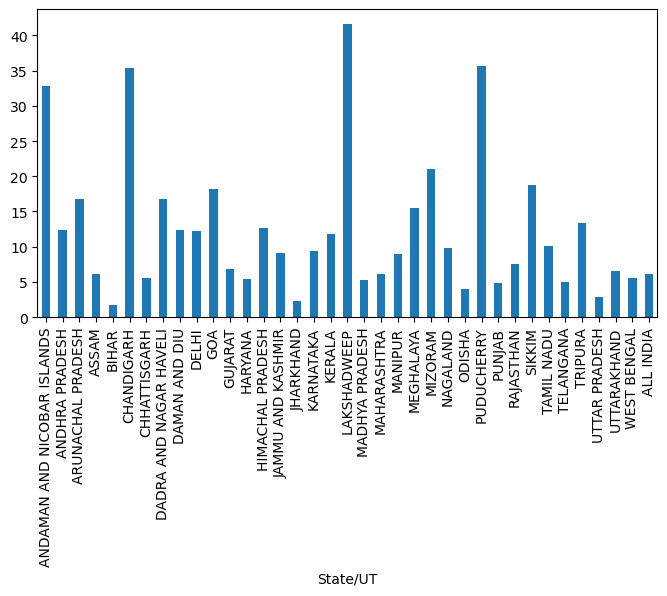

In [124]:
# visualizing the beds/pop for each state
# df_BedvsPop = df_BedvsPop.set_index(keys='State/UT')
df_BedvsPop.apply(lambda x: x['Beds']/x['Population'],axis=1).plot(kind='bar',figsize=(8,4),)

In [130]:
df_BedvsPop['BedVsPop'] = df_BedvsPop['Beds']/df_BedvsPop['Population']
df_BedvsPop.head()

,Population,Beds,BedVsPop
State/UT,,,
ANDAMAN AND NICOBAR ISLANDS,38,1246,32.789474
ANDHRA PRADESH,4939,60799,12.309982
ARUNACHAL PRADESH,138,2320,16.811594
ASSAM,3121,19115,6.124640
BIHAR,10410,17796,1.709510


In [134]:
# Report three States/UTs which have the least amount of beds for their population so that 
# more beds can be added to the hospitals in respective states.
df_BedvsPop.sort_values('BedVsPop').iloc[:3,:]

,Population,Beds,BedVsPop
State/UT,,,
BIHAR,10410,17796,1.709510
JHARKHAND,3299,7404,2.244316
UTTAR PRADESH,19981,58310,2.918272
